In [1]:
import pandas as pd
import matplotlib.pylab as plt
import time

sd = pd.read_csv(r'example_expenses.csv')

/Users/omi/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/omi/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
print('\nSpend data collected. Here is a preview...\n')
print(sd)



Spend data collected. Here is a preview...

   Transaction Date              Description        Category   Amount
0        11/25/2018              TRADER JOES         grocery   -28.21
1        11/25/2018                     CAFE     restaurants   -13.00
2        11/23/2018          CHEVRON 0207716             gas   -32.24
3        11/22/2018                  EXPRESS        shopping   -47.35
4        11/22/2018               GAP OUTLET        shopping   -21.80
5        11/17/2018                  SAFEWAY         grocery   -10.98
6        11/17/2018       Cheesecake Factory     restaurants   -75.00
7        11/17/2018              TRADER JOES         grocery   -54.68
8        11/16/2018                  SAFEWAY         grocery   -10.73
9        11/14/2018         Payment Received          CREDIT  1036.86
10       11/10/2018      Michelin restaurant     restaurants  -150.66
11       11/08/2018                  SAFEWAY         grocery   -10.55
12       11/06/2018                  COMCAST 

In [3]:
print('Printing a few interesting stats about the data:')
print(sd.describe())

Printing a few interesting stats about the data:
            Amount
count    54.000000
mean     34.356667
std     338.877684
min    -822.760000
25%     -48.760000
50%     -18.060000
75%      -8.512500
max    1288.010000


In [4]:
print('\nLet\'s remove the entries that are credit (not debit)')

sd = sd[sd.Amount < 0]
print(sd)
print('Done')



Let's remove the entries that are credit (not debit)
   Transaction Date              Description        Category  Amount
0        11/25/2018              TRADER JOES         grocery  -28.21
1        11/25/2018                     CAFE     restaurants  -13.00
2        11/23/2018          CHEVRON 0207716             gas  -32.24
3        11/22/2018                  EXPRESS        shopping  -47.35
4        11/22/2018               GAP OUTLET        shopping  -21.80
5        11/17/2018                  SAFEWAY         grocery  -10.98
6        11/17/2018       Cheesecake Factory     restaurants  -75.00
7        11/17/2018              TRADER JOES         grocery  -54.68
8        11/16/2018                  SAFEWAY         grocery  -10.73
10       11/10/2018      Michelin restaurant     restaurants -150.66
11       11/08/2018                  SAFEWAY         grocery  -10.55
12       11/06/2018                  COMCAST            misc  -44.99
14       11/03/2018          THE OVEN BAKERY     

In [5]:
#Removing year from transaction date:
print('\nRemoving the year form the date to make the graph more readable.')
sd['Transaction Date'] = sd['Transaction Date'].apply(lambda x: x.replace('/2018',''))
print('\nMassaging the data a bit more for readability.')
sd['Amount'] = sd['Amount'].apply(lambda x: x*-1)



Removing the year form the date to make the graph more readable.

Massaging the data a bit more for readability.


In [6]:
#iterating over dataframe
uniq_sd = {}

print('\nAggregating all the expenses for each date\n')
time.sleep(2)

for index, row in sd.iterrows():
    if row['Transaction Date'] in uniq_sd:
      uniq_sd[row['Transaction Date']] = uniq_sd[row['Transaction Date']] + row['Amount']
    else:
      uniq_sd[row['Transaction Date']] = row['Amount']

print('Done')


Aggregating all the expenses for each date

Done


In [7]:
# Cleanup memory about any previous graphs 
print('\nReady to create plots')
print('Removing any memory about previous plots')

plt.cla
plt.clf
plt.close()



Ready to create plots
Removing any memory about previous plots


Creating new plots


Text(0.5, 1.0, 'Spending for every day in the given time period')

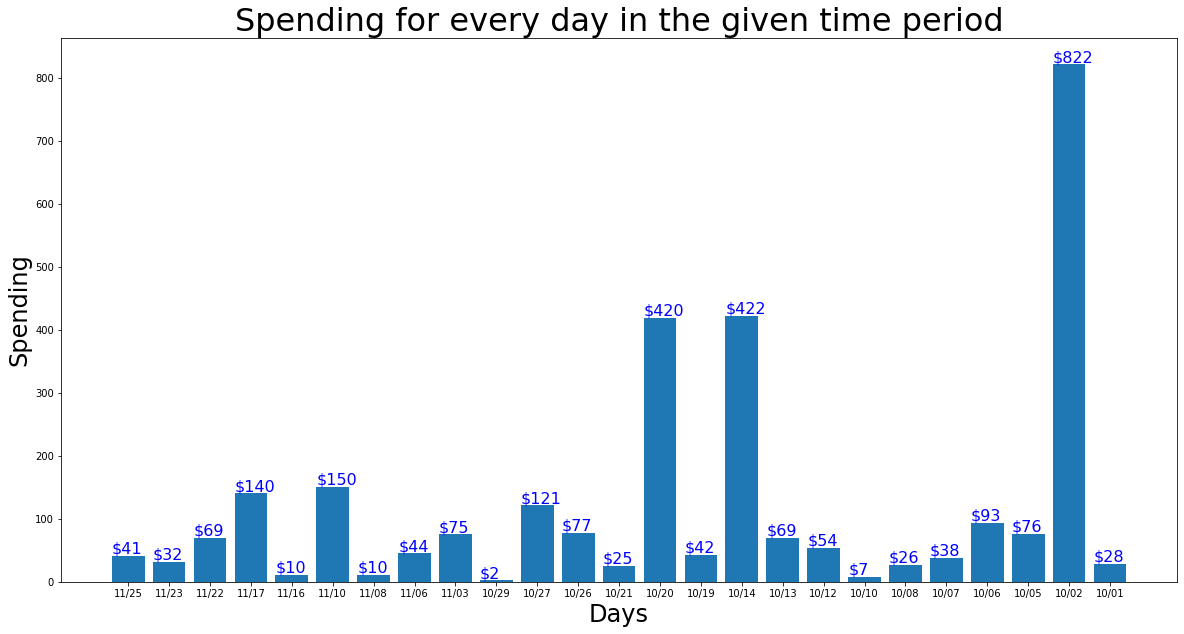

In [8]:
print('Creating new plots')
#plt.subplot(2,1,1)
plt.rcParams['figure.figsize'] = [20,10]
plt.bar(range(len(uniq_sd)), list(uniq_sd.values()), align='center')
plt.xticks(range(len(uniq_sd)), list(uniq_sd.keys()))

for x, y in enumerate(uniq_sd.values()):
    val = int(y)
    plt.text(x-0.4, val+4, '$'+str(val), color='blue', fontsize=16)

plt.xlabel('Days', fontsize=24)
plt.ylabel('Spending', fontsize=24)
plt.title('Spending for every day in the given time period', fontsize=32)

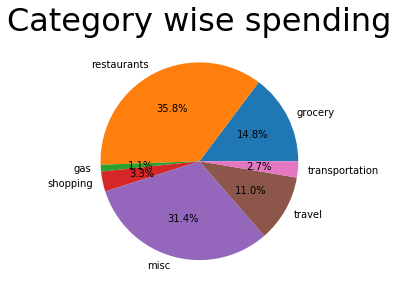

In [9]:
# Assign categories and then aggregate
category_expense = {}
for index, row in sd.iterrows():
  if row['Category'] in category_expense:
    category_expense[row['Category']] = category_expense[row['Category']] + row['Amount']
  else:
    category_expense[row['Category']] = row['Amount']

expense_values = list(category_expense.values())
expense_values = list(map(int, expense_values))

plt.subplot(2,1,2)
plt.title('Category wise spending', fontsize=32)
plt.rcParams['figure.figsize'] = [30,30]
plt.pie(expense_values, labels=list(category_expense.keys()),autopct='%1.1f%%')
plt.show()
